In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as immg
import random 


In [2]:
read_fil=os.listdir("images/")

In [3]:
imagee=os.listdir("images/")

In [4]:
read_fil

['cherry', 'chickoo', 'grapes', 'kiwi', 'mango', 'strawberry']

In [5]:
def image_show_d(fod):
    file_name=random.sample(os.listdir(fod),1)[0]
    im_picsl=immg.imread(fod+"/"+file_name)
    plt.imshow(im_picsl)

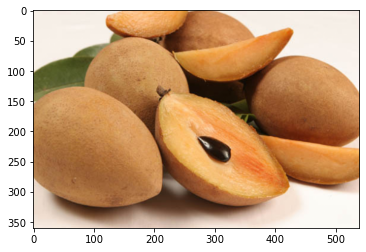

In [6]:
image_show_d("images/chickoo/")

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
imag_grenator=ImageDataGenerator(rescale=1/255.0,
                                validation_split=0.2,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                 
                                )
train_dir="images/"
test_dir="images/"

train_data=imag_grenator.flow_from_directory(train_dir,
                                            batch_size=32,
                                             subset="training",
                                            target_size=(224,224),
                                            class_mode="categorical",
                                             seed=42,
                                             
                                            )
test_data=imag_grenator.flow_from_directory(test_dir,
                                           batch_size=32,
                                            subset="validation",
                                           target_size=(224,224),
                                            class_mode="categorical",
                                           seed=32)

Found 192 images belonging to 6 classes.
Found 47 images belonging to 6 classes.


In [9]:
import tensorflow as tf

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           padding="valid",
                           input_shape=(224,224,3)
                         ),
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation="softmax")
])
model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["accuracy"])

history=model.fit(train_data,
         epochs=5,
         steps_per_epoch=len(train_data),
         validation_data=test_data,
         validation_split=len(test_data))


Epoch 1/5
6/6 [==============================] - 21s 3s/step - loss: 145.2770 - accuracy: 0.1771 - val_loss: 2.4604 - val_accuracy: 0.1702
Epoch 2/5
6/6 [==============================] - 12s 2s/step - loss: 1.8341 - accuracy: 0.2135 - val_loss: 1.8089 - val_accuracy: 0.1702
Epoch 3/5
6/6 [==============================] - 14s 2s/step - loss: 1.7791 - accuracy: 0.1823 - val_loss: 1.7662 - val_accuracy: 0.2340
Epoch 4/5
6/6 [==============================] - 18s 3s/step - loss: 1.9075 - accuracy: 0.2292 - val_loss: 1.7831 - val_accuracy: 0.1915
Epoch 5/5
6/6 [==============================] - 16s 3s/step - loss: 1.7920 - accuracy: 0.1615 - val_loss: 1.7930 - val_accuracy: 0.1702


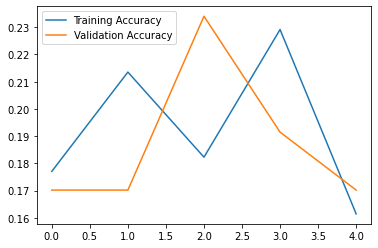

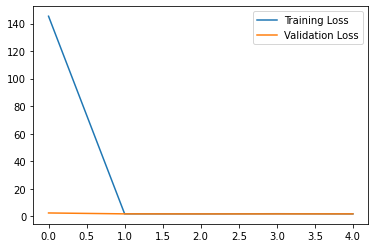

In [11]:
# رسم الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [12]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,#9 مقدار المرور على البكسلات وهو
                           padding="valid",#هوامش الصورة بحيث تاخذ القيمة صفر للبكسلات
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية
                           input_shape=(224,224,3),#توحيد ابعاد الصور او احجامها المدخلة بحيث تكون كا التالي  وايضا قنوات اللوان تكون RGB
                           
                          ),
    
    
    tf.keras.layers.MaxPool2D(),#تأخذ الاجزاء المهمة في الصورة
      
    tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية

                          ),#9 مقدار المرور على البكسلات وهو
                        #سبب حذف بعض الخصئص هو ان مخرجات الطبقة هي مدخلات الصبقة الاولى
   tf.keras.layers.MaxPool2D(),

   tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية            
                          ),#9 مقدار المرور على البكسلات وهو
                        #سبب حذف بعض الخصئص هو ان مخرجات الطبقة هي مدخلات الصبقة الاولى
   
               tf.keras.layers.MaxPool2D(),       
              tf.keras.layers.Flatten(),
    #تحويل الصورة إلى بعد واحد
              tf.keras.layers.Dense(6,activation="softmax")
    #تصنيف المخرجات متعدد
])
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),#دالة الخطاء تستحدم في مشاكل التصنيف المتعدد
             optimizer=tf.keras.optimizers.Adam(),#خوارميات التحسين تستخدم لتحديث الاوزان بشكل فعال اثنا التدريب
              metrics=["accuracy"]#مقياس لتقيم الدقة
             )

             


#تدريب النموذجfit
historye=model_3.fit(train_data,
         epochs=7,#عدد الدورات التدريبية التي سيمر بها النموذج على البيانات)
         steps_per_epoch=len(train_data),#عدد بيانات التدريب
         validation_data=test_data,#البيانات المستخدمة للتحقق من  أداء النموذج
         validation_steps=len(test_data)#عدد بيانات الاختبار
                 )
                    

Epoch 1/7
6/6 [==============================] - 19s 3s/step - loss: 1.8178 - accuracy: 0.1562 - val_loss: 1.7717 - val_accuracy: 0.1915
Epoch 2/7
6/6 [==============================] - 17s 3s/step - loss: 1.7490 - accuracy: 0.2865 - val_loss: 1.6753 - val_accuracy: 0.3617
Epoch 3/7
6/6 [==============================] - 15s 3s/step - loss: 1.6388 - accuracy: 0.3646 - val_loss: 1.4992 - val_accuracy: 0.3830
Epoch 4/7
6/6 [==============================] - 13s 2s/step - loss: 1.4809 - accuracy: 0.3646 - val_loss: 1.3646 - val_accuracy: 0.4468
Epoch 5/7
6/6 [==============================] - 19s 3s/step - loss: 1.3873 - accuracy: 0.4427 - val_loss: 1.2936 - val_accuracy: 0.4043
Epoch 6/7
6/6 [==============================] - 19s 3s/step - loss: 1.3473 - accuracy: 0.3906 - val_loss: 1.3485 - val_accuracy: 0.4043
Epoch 7/7
6/6 [==============================] - 17s 3s/step - loss: 1.2371 - accuracy: 0.5208 - val_loss: 1.1405 - val_accuracy: 0.5106


In [13]:
import pandas as pd

In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,145.276993,0.177083,2.460355,0.170213
1,1.834150,0.213542,1.808935,0.170213
2,1.779120,0.182292,1.766163,0.234043
3,1.907538,0.229167,1.783119,0.191489
4,1.792005,0.161458,1.792976,0.170213


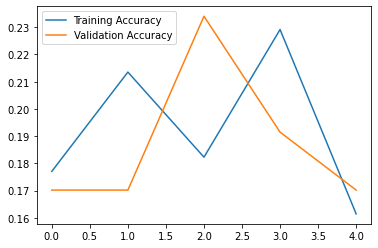

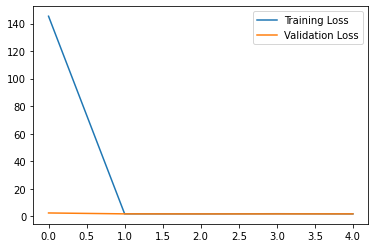

In [15]:
# رسم الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [16]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,#9 مقدار المرور على البكسلات وهو
                           padding="valid",#هوامش الصورة بحيث تاخذ القيمة صفر للبكسلات
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية
                           input_shape=(224,224,3),#توحيد ابعاد الصور او احجامها المدخلة بحيث تكون كا التالي  وايضا قنوات اللوان تكون RGB
                           
                          ),
    
    
    tf.keras.layers.MaxPool2D(),#تأخذ الاجزاء المهمة في الصورة
      
    tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية

                          ),#9 مقدار المرور على البكسلات وهو
                        #سبب حذف بعض الخصئص هو ان مخرجات الطبقة هي مدخلات الصبقة الاولى
   tf.keras.layers.MaxPool2D(),

   tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية            
                          ),#9 مقدار المرور على البكسلات وهو
                        #سبب حذف بعض الخصئص هو ان مخرجات الطبقة هي مدخلات الصبقة الاولى
   
               tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,#الشبكات العصبية مكونة من طبقات مختلفة وهذا كل صوره في الطبقة تعالجة ب فلتر مختلف
                           kernel_size=3,
                           activation="relu",#تحول العلاقة الخطية إلى غير خطية

                          ),#9 مقدار المرور على البكسلات وهو
                        #سبب حذف بعض الخصئص هو ان مخرجات الطبقة هي مدخلات الصبقة الاولى
   tf.keras.layers.MaxPool2D(),

   tf.keras.layers.Flatten(),#تحويل الصورة إلى بعد واحد
             
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),


    

    tf.keras.layers.Dense(6,activation="softmax")
    #تصنيف المخرجات متعدد
])
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),#دالة الخطاء تستحدم في مشاكل التصنيف المتعدد
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#خوارميات التحسين تستخدم لتحديث الاوزان بشكل فعال اثنا التدريب
              metrics=["accuracy"]#مقياس لتقيم الدقة
             )

             


#تدريب النموذجfit
historye=model_4.fit(train_data,
         epochs=40,#عدد الدورات التدريبية التي سيمر بها النموذج على البيانات)
         steps_per_epoch=len(train_data),#عدد بيانات التدريب
         validation_data=test_data,#البيانات المستخدمة للتحقق من  أداء النموذج
         validation_steps=len(test_data)#عدد بيانات الاختبار
                 )
                    

Epoch 1/40
6/6 [==============================] - 21s 3s/step - loss: 1.8065 - accuracy: 0.1562 - val_loss: 1.7892 - val_accuracy: 0.1489
Epoch 2/40
6/6 [==============================] - 15s 2s/step - loss: 1.7844 - accuracy: 0.2083 - val_loss: 1.7711 - val_accuracy: 0.2128
Epoch 3/40
6/6 [==============================] - 11s 2s/step - loss: 1.7498 - accuracy: 0.2604 - val_loss: 1.6998 - val_accuracy: 0.2979
Epoch 4/40
6/6 [==============================] - 18s 3s/step - loss: 1.6411 - accuracy: 0.2865 - val_loss: 1.5217 - val_accuracy: 0.3191
Epoch 5/40
6/6 [==============================] - 19s 3s/step - loss: 1.4886 - accuracy: 0.2969 - val_loss: 1.4253 - val_accuracy: 0.3617
Epoch 6/40
6/6 [==============================] - 18s 3s/step - loss: 1.3661 - accuracy: 0.3333 - val_loss: 1.3531 - val_accuracy: 0.3404
Epoch 7/40
6/6 [==============================] - 18s 3s/step - loss: 1.3019 - accuracy: 0.3385 - val_loss: 1.1982 - val_accuracy: 0.4468
Epoch 8/40
6/6 [==================

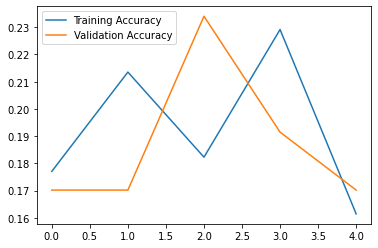

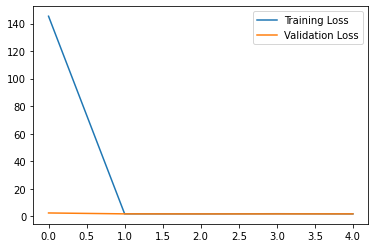

In [17]:
# رسم الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [18]:
def image_prodects(file_namee,image_si=224):
    imag_file=tf.io.read_file(file_namee)
    imag_encod=tf.image.decode_image(imag_file,channels=3)
    image_rezizee=tf.image.resize(imag_encod,size=[image_si,image_si])
    image_expanda=tf.expand_dims(image_rezizee,axis=0)
    imag_pexl=image_expanda/255.0
    imag_prod=model_3.predict(imag_pexl)
    print(imag_prod)
    print(imag_prod.argmax())
    restee=imagee[imag_prod.argmax()]
    plt.imshow(imag_encod)
    plt.title(restee)
    return restee
    
    



1/1 [==============================] - 0s 218ms/step
[[0.01834781 0.24608575 0.08986132 0.2512292  0.38990617 0.00456976]]
4


'mango'

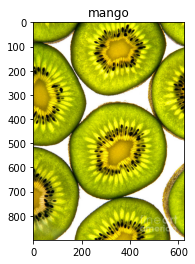

In [19]:
 image_prodects("a/Image_28.jpg")